In [1]:
%config Completer.use_jedi = False

In [2]:
import  pandas  as  pd
import  numpy  as  np
import  matplotlib.pyplot  as  plt
import  seaborn  as  sns
from  sklearn.metrics  import  *
from  tensorflow.keras.models  import  Sequential
from  tensorflow.keras.layers  import  Dense,Dropout,Conv2D,MaxPool2D,Flatten
from  tensorflow.keras.datasets  import  cifar10
from  tensorflow.keras.utils  import  to_categorical
from  tensorflow.keras.callbacks  import  EarlyStopping
import warnings
warnings.filterwarnings('ignore')

2024-08-04 21:24:16.063215: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 21:24:16.063319: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 21:24:16.166614: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

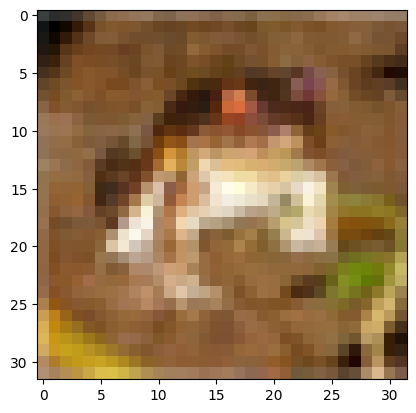

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
y_test.shape

(10000, 1)

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [10]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [11]:
x_train = x_train.reshape(50000, 32, 32, 3)
x_test = x_test.reshape(10000, 32, 32, 3)

In [12]:

# Couche convolutive
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


# Couche convolutive
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


# Couche Flatten
model.add(Flatten())

# Couche Dense
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [15]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
  73/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1306 - loss: 2.2800

I0000 00:00:1722806681.468989      67 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3655 - loss: 1.7364 - val_accuracy: 0.5414 - val_loss: 1.2834
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5740 - loss: 1.2004 - val_accuracy: 0.6012 - val_loss: 1.1362
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6440 - loss: 1.0156 - val_accuracy: 0.6439 - val_loss: 1.0203
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6941 - loss: 0.8807 - val_accuracy: 0.6501 - val_loss: 1.0288
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7227 - loss: 0.7897 - val_accuracy: 0.6811 - val_loss: 0.9318
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7582 - loss: 0.7011 - val_accuracy: 0.6773 - val_loss: 0.9415
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7824 - loss: 0.6263 - val_accuracy: 0.6863 - val_loss: 0.9523
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8028 - loss: 0.5579 - val_accura

<Axes: >

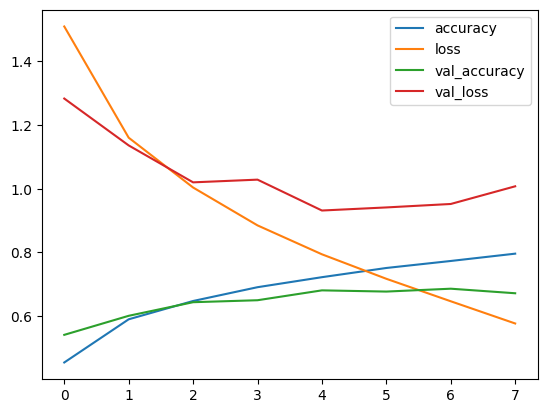

In [16]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [17]:
ypred=np.argmax(model.predict(x_test),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
ypred

array([3, 1, 1, ..., 5, 1, 7])

In [19]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1000
           1       0.84      0.75      0.79      1000
           2       0.58      0.55      0.56      1000
           3       0.44      0.56      0.50      1000
           4       0.60      0.63      0.62      1000
           5       0.56      0.55      0.55      1000
           6       0.77      0.75      0.76      1000
           7       0.69      0.76      0.72      1000
           8       0.82      0.72      0.77      1000
           9       0.81      0.75      0.78      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.68     10000
weighted avg       0.68      0.67      0.68     10000



<Axes: >

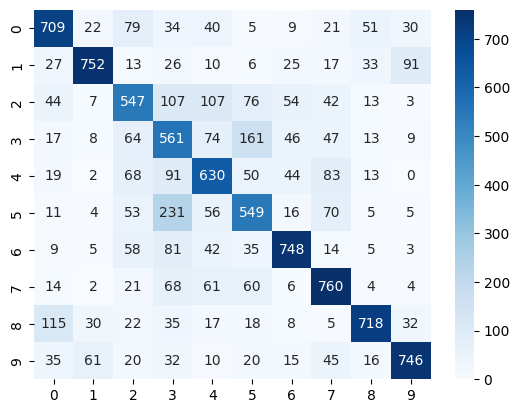

In [20]:
sns.heatmap(confusion_matrix(y_test,ypred), 
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
